In [6]:
#Importing Base Libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [7]:
#Importing the raw dataset
df = pd.read_csv(r'C:\Users\Deep Joshi\Desktop\Data Analysis\Machine Learning\Income Prediction\data\raw\CensusData.csv')
df.head()

,Age,Work Class,Final Weight,Education,Education Number,Marital Status,Occupation,Relationship,Race,Gender,Capital Gain,Capital Loss,Hours/Week,Counrty,Income
0,19.0,Private,192453,Some-college,562.0,Never-married,Other-service,Other-relative,White,Female,0,0,25.0,United-States,<=50K
1,26.0,Private,167350,HS-grad,100.0,Never-married,Other-service,Other-relative,White,Male,0,0,30.0,United-States,<=50K
2,40.0,Private,193524,Doctorate,16.0,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,60.0,United-States,>50K
3,42.0,Private,116632,Doctorate,16.0,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,45.0,United-States,>50K
4,43.0,Federal-gov,410867,Doctorate,16.0,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,50.0,United-States,>50K


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
Age                 32551 non-null float64
Work Class          32556 non-null object
Final Weight        32553 non-null object
Education           32554 non-null object
Education Number    32554 non-null float64
Marital Status      32561 non-null object
Occupation          32559 non-null object
Relationship        32561 non-null object
Race                32561 non-null object
Gender              32561 non-null object
Capital Gain        32561 non-null int64
Capital Loss        32561 non-null int64
Hours/Week          32556 non-null float64
Counrty             32561 non-null object
Income              32561 non-null object
dtypes: float64(3), int64(2), object(10)
memory usage: 3.7+ MB


# Data Preprocessing 
## Numerical Attributes
### 1. Handling Missing Values

In [9]:
#Finding total number of missing values within each columns
print(df.isnull().sum())

Age                 10
Work Class           5
Final Weight         8
Education            7
Education Number     7
Marital Status       0
Occupation           2
Relationship         0
Race                 0
Gender               0
Capital Gain         0
Capital Loss         0
Hours/Week           5
Counrty              0
Income               0
dtype: int64


count    32551.000000
mean        38.586802
std         13.665623
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max        164.000000
Name: Age, dtype: float64


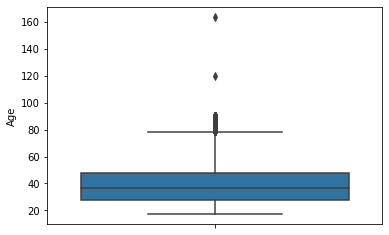

In [10]:
#---------AGE---------------
# Descriptive Statistics
print(df['Age'].describe())
sns.boxplot(y=df['Age'])

In [11]:
# Replacing missing values in Age with the mean value
df['Age'].fillna(df['Age'].median(),inplace=True)
df['Age'].isnull().any()

False

In [12]:
#Outlier Treatment
Q1_age = df['Age'].quantile(0.25)
Q3_age = df['Age'].quantile(0.75)
IQR = Q3_age - Q1_age

indexNamesAge = df[ df['Age'] < (Q1_age - 1.5 * IQR) ].index
indexNamesAge2 = df[ df['Age'] > (Q3_age + 1.5 * IQR) ].index
# Delete these row indexes from dataFrame
df.drop(indexNamesAge , inplace=True)
df.drop(indexNamesAge2 , inplace=True)

print(df['Age'].describe())

count    32416.000000
mean        38.379905
std         13.328179
min         17.000000
25%         28.000000
50%         37.000000
75%         47.000000
max         78.000000
Name: Age, dtype: float64


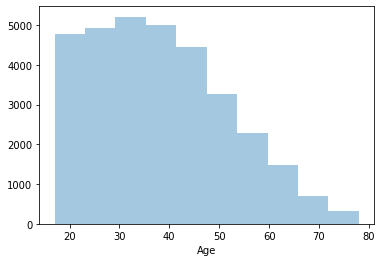

In [13]:
#Frequency Distribution on AGE 
sns.distplot(df.Age,kde=False,bins=10)

In [14]:
# -------------- Final Weight--------------------
# Descriptive Statistics
df['Final Weight'].describe() 
# As we can see, the data type of Final Weight is object where as it contains all numeric values 

count      32408
unique     21528
top       123011
freq          13
Name: Final Weight, dtype: object

count    3.240700e+04
mean     1.898755e+05
std      1.056074e+05
min      1.000000e+00
25%      1.178480e+05
50%      1.785050e+05
75%      2.372825e+05
max      1.484705e+06
Name: Final Weight, dtype: float64


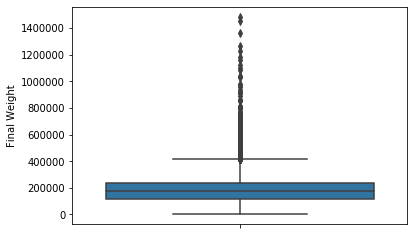

In [15]:
# Converting to Final Weight feature in the data frame to numeric
df['Final Weight'] = pd.to_numeric(df['Final Weight'],errors='coerce')
print(df['Final Weight'].describe())
sns.boxplot(y=df['Final Weight'])
# By analyzing the boxplot, we can see that there are many values that fall away from the maximum value allowed (i.e > 1.5*IQR)
# We can infer them as suspected outliers. 
# Since we are dealing with monetary data & according to the feature description, it would not be a great idea to manipulate such values

In [16]:
# Replacing missing values in Final Weight with the mean value
df['Final Weight'].fillna(df['Final Weight'].mean(),inplace=True)
df['Final Weight'].isnull().any()

False

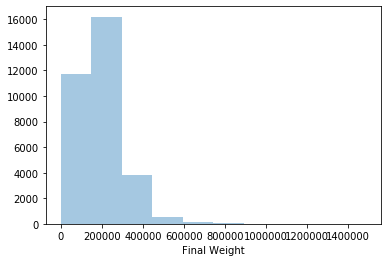

In [17]:
#Frequency Distribution on FINAL WEIGHT 
sns.distplot(df['Final Weight'],kde=False,bins=10)

count    32409.000000
mean        10.102996
std          4.030257
min          1.000000
25%          9.000000
50%         10.000000
75%         12.000000
max        562.000000
Name: Education Number, dtype: float64


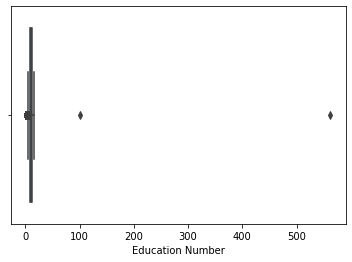

In [18]:
# ----------------- Education Number --------------------
# Descriptive Statistics
print(df['Education Number'].describe())
sns.boxplot(x=df['Education Number'])
# By analyzing the boxplot and descriptive stats data, we can see that there are 2 values that fall away from the maximum value allowed (i.e > 1.5*IQR)
# We can consider them as outliers and handle them later

In [20]:
#Outlier Treatment
Q1 = df['Education Number'].quantile(0.25)
Q3 = df['Education Number'].quantile(0.75)
IQR = Q3 - Q1

indexNames = df[ df['Education Number'] < (Q1 - 1.5 * IQR) ].index
indexNames2 = df[ df['Education Number'] > (Q3 + 1.5 * IQR) ].index
# Delete these row indexes from dataFrame
df.drop(indexNames , inplace=True)
df.drop(indexNames2 , inplace=True)

print(df['Education Number'].describe())

count    31230.000000
mean        10.338425
std          2.240869
min          5.000000
25%          9.000000
50%         10.000000
75%         13.000000
max         16.000000
Name: Education Number, dtype: float64


In [21]:
# Replacing missing values in Education Number with the mean value
df['Education Number'].fillna(df['Education Number'].median(),inplace=True)
df['Education Number'].isnull().any()

False

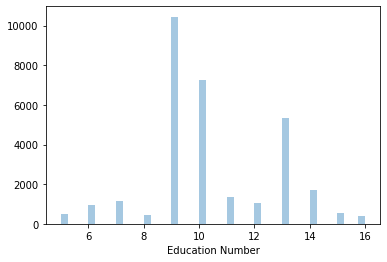

In [22]:
#Frequency Distribution on EDUCATION NUMBER
sns.distplot(df['Education Number'],kde=False)

count    31237.000000
mean      1108.826360
std       7526.863072
min         -1.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      99999.000000
Name: Capital Gain, dtype: float64


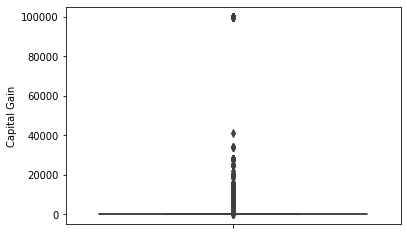

In [23]:
# ---------------Capital Gain-----------------
# Descriptive Statistics
print(df['Capital Gain'].describe())
# From the descriptive statistics, we can see that the min value is negative, which mostly infers Capital Loss.
# But since we have a separate feature for Capital Loss, it is very much important we handle such negative values.
sns.boxplot(y=df['Capital Gain'])
# By analyzing the boxplot, we can see that there are many values that fall away from the maximum value allowed (i.e > 1.5*IQR)
# We can infer them as suspected outliers. 
# Since we are dealing with monetary data & according to the feature description, it would not be a great idea to manipulate such values

In [24]:
df['Capital Gain'].fillna(df['Capital Gain'].median(),inplace=True)
df['Capital Gain'].isnull().any()

False

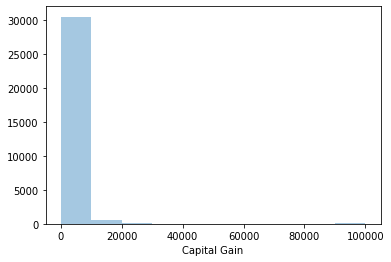

In [25]:
#Frequency Distribution of EDUCATION NUMBER
sns.distplot(df['Capital Gain'],kde=False,bins=10)

count    31237.000000
mean        87.936390
std        403.202936
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       4356.000000
Name: Capital Loss, dtype: float64


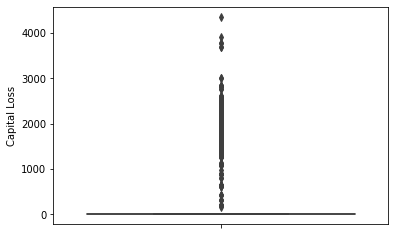

In [26]:
# --------------- Capital Loss --------------
# Descriptive Statistics
print(df['Capital Loss'].describe())
sns.boxplot(y=df['Capital Loss'])
# By analyzing the boxplot, we can see that there are many values that fall away from the maximum value allowed (i.e > 1.5*IQR)
# We can infer them as suspected outliers. 
# Since we are dealing with monetary data & according to the feature description, it would not be a great idea to manipulate such values

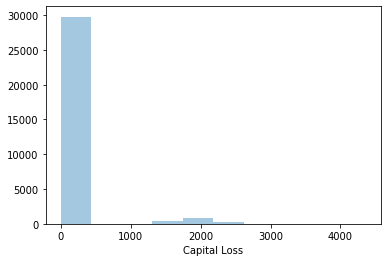

In [27]:
#Frequency Distribution of CAPITAL LOSS
sns.distplot(df['Capital Loss'],kde=False,bins=10)

count    31232.000000
mean        40.540343
std         12.272932
min          1.000000
25%         40.000000
50%         40.000000
75%         45.000000
max         99.000000
Name: Hours/Week, dtype: float64


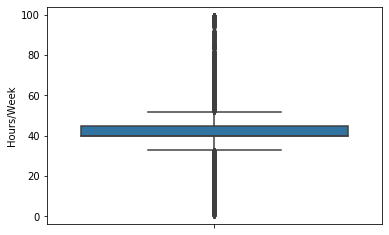

In [28]:
# ----------- Hours Per Week -----------------
# Descriptive Statistics
print(df['Hours/Week'].describe())
sns.boxplot(y=df['Hours/Week'])

count    22643.000000
mean        41.598419
std          4.027714
min         33.000000
25%         40.000000
50%         40.000000
75%         43.000000
max         52.000000
Name: Hours/Week, dtype: float64


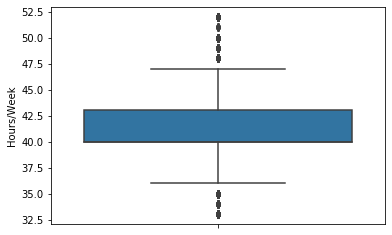

In [29]:
#Outlier Treatment
Q1 = df['Hours/Week'].quantile(0.25)
Q3 = df['Hours/Week'].quantile(0.75)
IQR = Q3 - Q1

indexNames = df[ df['Hours/Week'] < (Q1 - 1.5 * IQR) ].index
indexNames2 = df[ df['Hours/Week'] > (Q3 + 1.5 * IQR) ].index
# Delete these row indexes from dataFrame
df.drop(indexNames , inplace=True)
df.drop(indexNames2 , inplace=True)

print(df['Hours/Week'].describe())
sns.boxplot(y=df['Hours/Week'])

In [30]:
# Replacing missing values in Hours Per Week with the mean value
df['Hours/Week'].fillna(df['Hours/Week'].median(),inplace=True)
df['Hours/Week'].isnull().any()

False

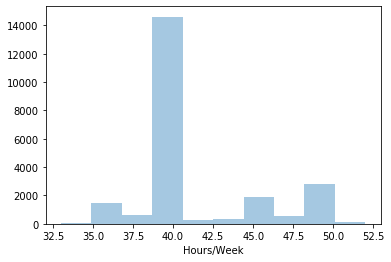

In [31]:
#Frequency Distribution of HOURS PER WEEK
sns.distplot(df['Hours/Week'],kde=False,bins=10)

In [32]:
# Checking if we have efficiently replaced all the missing values in numerical attributes
df.isnull().any()

Age                 False
Work Class           True
Final Weight        False
Education            True
Education Number    False
Marital Status      False
Occupation           True
Relationship        False
Race                False
Gender              False
Capital Gain        False
Capital Loss        False
Hours/Week          False
Counrty             False
Income              False
dtype: bool

### 3. Handling incorrectly recorded values 

In [33]:
# Handling negative values in Capital Gain
# We saw earlier, that Capital Gain had some negative values. Hence, we would replace it with the most frequent value.
# Large values have high influence on the mean and here, it would not be a great idea to replace it with mean.
df.loc[df['Capital Gain'] < 0 , 'Capital Gain'] = 0
df['Capital Gain'].describe()

count    22648.000000
mean      1020.874205
std       6838.627164
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      99999.000000
Name: Capital Gain, dtype: float64

In [34]:
df.head(5)

,Age,Work Class,Final Weight,Education,Education Number,Marital Status,Occupation,Relationship,Race,Gender,Capital Gain,Capital Loss,Hours/Week,Counrty,Income
3,42.0,Private,116632.0,Doctorate,16.0,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,45.0,United-States,>50K
4,43.0,Federal-gov,410867.0,Doctorate,16.0,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,50.0,United-States,>50K
8,29.0,Private,133937.0,Doctorate,16.0,Never-married,Prof-specialty,Own-child,White,Male,0,0,40.0,United-States,<=50K
11,50.0,Self-emp-inc,195322.0,Doctorate,16.0,Separated,Prof-specialty,Not-in-family,White,Male,0,0,40.0,United-States,>50K
12,35.0,Private,292472.0,Doctorate,16.0,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40.0,Taiwan,>50K


## Categorical Attributes 

In [35]:
#------------ Work Class -----------
# Checking for null values and descriptive statistics
print(df['Work Class'].isnull().any())
print(df['Work Class'].describe())

True
count        22644
unique           9
top        Private
freq         16325
Name: Work Class, dtype: object


In [36]:
df['Work Class'].unique()
# There are some nan values along with some incorrectly recorded values like '?'

array([' Private', ' Federal-gov', ' Self-emp-inc', ' State-gov',
       ' Local-gov', ' Self-emp-not-inc', ' ?', nan, ' Without-pay',
       ' Never-worked'], dtype=object)

In [37]:
# Replacing incorrect data or missing data with value having the most count in the dataset i.e PRIVATE in this case
df.loc[df['Work Class'] == " ?", 'Work Class'  ] = " Private"
df['Work Class'].fillna(" Private",inplace=True)
df['Work Class'].unique()

array([' Private', ' Federal-gov', ' Self-emp-inc', ' State-gov',
       ' Local-gov', ' Self-emp-not-inc', ' Without-pay', ' Never-worked'],
      dtype=object)

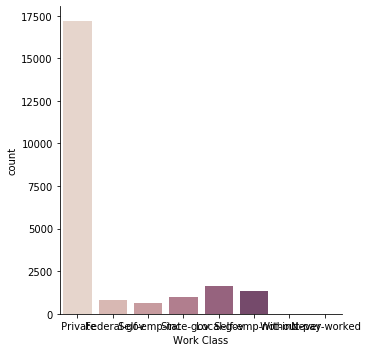

In [38]:
sns.catplot(x="Work Class", kind="count", palette="ch:.10",data=df);

In [40]:
# ------------- Education ------------
# Since we already have Education Number feature, we can drop Education attribute. Otherwise it will increase model complexity
df = df.drop('Education',axis=1)
df.head(5)

,Age,Work Class,Final Weight,Education Number,Marital Status,Occupation,Relationship,Race,Gender,Capital Gain,Capital Loss,Hours/Week,Counrty,Income
3,42.0,Private,116632.0,16.0,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,45.0,United-States,>50K
4,43.0,Federal-gov,410867.0,16.0,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,50.0,United-States,>50K
8,29.0,Private,133937.0,16.0,Never-married,Prof-specialty,Own-child,White,Male,0,0,40.0,United-States,<=50K
11,50.0,Self-emp-inc,195322.0,16.0,Separated,Prof-specialty,Not-in-family,White,Male,0,0,40.0,United-States,>50K
12,35.0,Private,292472.0,16.0,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40.0,Taiwan,>50K


In [41]:
# ----------- Marital Status -----------
# Checking for null values and descriptive statistics
print(df['Marital Status'].isnull().any())
print(df['Marital Status'].describe())

False
count                   22648
unique                      7
top        Married-civ-spouse
freq                    10849
Name: Marital Status, dtype: object


In [42]:
df['Marital Status'].unique()

array([' Married-civ-spouse', ' Never-married', ' Separated', ' Divorced',
       ' Married-spouse-absent', ' Widowed', ' Married-AF-spouse'],
      dtype=object)

In [43]:
# Replacing all instances of 'Married______' status with common married status. Similarly, with other status
df.loc[(df['Marital Status'] == " Married-civ-spouse") |
       (df['Marital Status'] == " Married-AF-spouse"), 'Marital Status'  ] = " Married"
df.loc[df['Marital Status'] != " Married" , 'Marital Status'  ] = " Independent"
df['Marital Status'].unique()

array([' Married', ' Independent'], dtype=object)

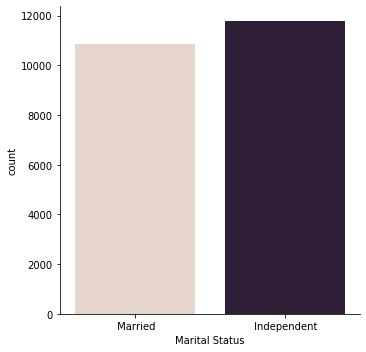

In [44]:
sns.catplot(x="Marital Status", kind="count", palette="ch:.10",data=df);

In [45]:
# ------------ Occupation ------------------
# Checking for null values and descriptive statistics
print(df['Occupation'].isnull().any())
print(df['Occupation'].describe())

True
count             22646
unique               15
top        Craft-repair
freq               3315
Name: Occupation, dtype: object


In [46]:
# There are some nan values along with some incorrectly recorded values like '?'
# We will replace it most frequent category
df['Occupation'].fillna(" Prof-specialty",inplace=True)
df.loc[df['Occupation'] == " ?", 'Occupation'  ] = " Prof-specialty"
df['Occupation'].unique()

array([' Prof-specialty', ' Exec-managerial', ' Adm-clerical', ' Sales',
       ' Craft-repair', ' Farming-fishing', ' Tech-support',
       ' Transport-moving', ' Machine-op-inspct', ' Protective-serv',
       ' Other-service', ' Handlers-cleaners', ' Priv-house-serv',
       ' Armed-Forces'], dtype=object)

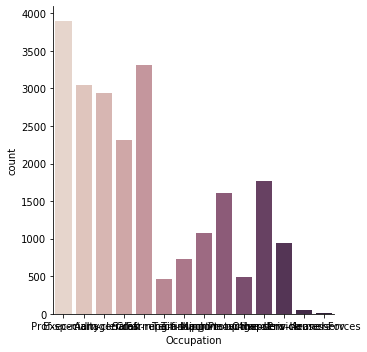

In [47]:
sns.catplot(x="Occupation", kind="count", palette="ch:.10",data=df);

In [48]:
# ------------- Relationship -----------------
# Checking for null values and descriptive statistics
print(df['Relationship'].isnull().any())
print(df['Relationship'].describe())

False
count        22648
unique           7
top        Husband
freq          9631
Name: Relationship, dtype: object


In [49]:
df['Relationship'].unique()
# There are some nan values along with some incorrectly recorded values like '?'

array([' Husband', ' Not-in-family', ' Own-child', ' Wife', ' Unmarried',
       ' Other-relative', '?'], dtype=object)

In [50]:
# In this case, it would not be great idea to just replace the incorrect values with most frequent category
# Example : Suppose most frequent category is Husband. But we have to look other entries in the same observation as well. 
# Replacing entry with Husband where the gender in the same observation is Female does not make sense.
# Hence, we will examine other attributes in the same observation before replacing them.
df.loc[df['Relationship'] == "?"]

,Age,Work Class,Final Weight,Education Number,Marital Status,Occupation,Relationship,Race,Gender,Capital Gain,Capital Loss,Hours/Week,Counrty,Income
418,37.0,Private,112763.0,15.0,Married,Prof-specialty,?,White,Female,0,0,40.0,United-States,>50K
9136,29.0,Private,271466.0,11.0,Independent,Prof-specialty,?,White,Male,0,0,43.0,United-States,<=50K
10543,49.0,Private,81973.0,10.0,Married,Craft-repair,?,Asian-Pac-Islander,Male,0,0,40.0,United-States,>50K
10597,25.0,Private,344991.0,10.0,Married,Craft-repair,?,White,Male,0,0,40.0,United-States,<=50K
17892,24.0,Private,278130.0,9.0,Independent,Craft-repair,?,White,Male,0,0,40.0,United-States,<=50K


In [51]:
# Now we will replace the incorrect relationship status by checking the gender and age in the same row
print(df['Relationship'].value_counts())
df.loc[(df['Relationship'] == "?") & (df['Gender'] == " Male"), 'Relationship'  ] = " Husband"
df.loc[(df['Relationship'] == "?") & (df['Gender'] == " Female") & (df['Marital Status'] == " Married"), 'Relationship'  ] = " Wife"
df.loc[(df['Relationship'] == "?") & (df['Gender'] == " Female") & (df['Marital Status'] == " Independent") & (df['Age'] < 18 ), 'Relationship'  ] = " Unmarried"
print(df['Relationship'].unique())

 Husband           9631
 Not-in-family     5967
 Own-child         2801
 Unmarried         2551
 Wife              1071
 Other-relative     622
?                     5
Name: Relationship, dtype: int64
[' Husband' ' Not-in-family' ' Own-child' ' Wife' ' Unmarried'
 ' Other-relative']


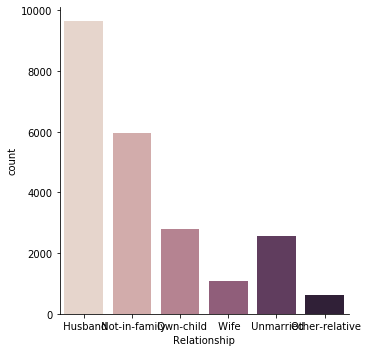

In [52]:
sns.catplot(x="Relationship", kind="count", palette="ch:.10",data=df);

In [53]:
# ------------ Race ----------------
# Checking for null values and descriptive statistics
print(df['Race'].isnull().any())
print(df['Race'].describe())

False
count      22648
unique         6
top        White
freq       19196
Name: Race, dtype: object


In [54]:
df['Race'].unique()
# There are some nan values along with some incorrectly recorded values like '?'
# We will replace it most frequent category

array([' White', ' Asian-Pac-Islander', ' Black', ' Other',
       ' Amer-Indian-Eskimo', '?'], dtype=object)

In [55]:
df.loc[df['Race'] == "?", 'Race'  ] = " White"
df['Race'].unique()

array([' White', ' Asian-Pac-Islander', ' Black', ' Other',
       ' Amer-Indian-Eskimo'], dtype=object)

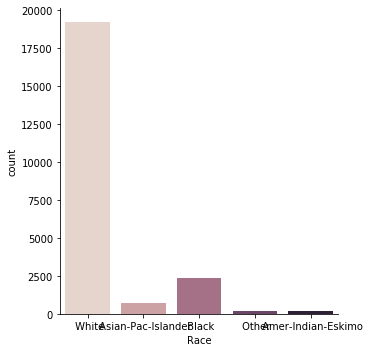

In [56]:
sns.catplot(x="Race", kind="count", palette="ch:.10",data=df);

In [57]:
# ------------ Gender -------------
# Checking for null values and descriptive statistics
print(df['Gender'].isnull().any())
print(df['Gender'].describe())

False
count     22648
unique        2
top        Male
freq      15501
Name: Gender, dtype: object


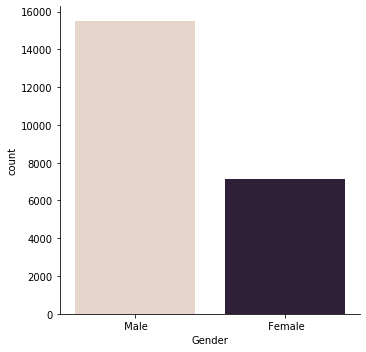

In [58]:
sns.catplot(x="Gender", kind="count", palette="ch:.10",data=df);

In [59]:
# ----------- Country ------------
# Checking for null values and descriptive statistics
print(df['Counrty'].isnull().any())
print(df['Counrty'].describe())

False
count              22648
unique                42
top        United-States
freq               20539
Name: Counrty, dtype: object


In [60]:
df['Counrty'].unique()
# There are some nan values along with some incorrectly recorded values like '?'
# We will replace it most frequent country

array([' United-States', ' Taiwan', ' ?', ' England', ' Canada', ' India',
       ' Mexico', ' Iran', ' China', ' Italy', ' Columbia', ' Cuba',
       ' France', ' Germany', ' Japan', ' Thailand', ' Jamaica',
       ' Poland', ' Hong', ' Vietnam', ' Greece', ' Philippines',
       ' Haiti', ' South', ' El-Salvador', ' Laos', ' Dominican-Republic',
       ' Peru', ' Nicaragua', ' Ecuador', ' Scotland', ' Trinadad&Tobago',
       ' Ireland', ' Portugal', ' Honduras', ' Cambodia', ' Puerto-Rico',
       ' Yugoslavia', ' Hungary', ' Outlying-US(Guam-USVI-etc)',
       ' Guatemala', ' Holand-Netherlands'], dtype=object)

In [61]:
df.loc[df['Counrty'] == " ?", 'Counrty'  ] = " United-States"
df['Counrty'].unique()

array([' United-States', ' Taiwan', ' England', ' Canada', ' India',
       ' Mexico', ' Iran', ' China', ' Italy', ' Columbia', ' Cuba',
       ' France', ' Germany', ' Japan', ' Thailand', ' Jamaica',
       ' Poland', ' Hong', ' Vietnam', ' Greece', ' Philippines',
       ' Haiti', ' South', ' El-Salvador', ' Laos', ' Dominican-Republic',
       ' Peru', ' Nicaragua', ' Ecuador', ' Scotland', ' Trinadad&Tobago',
       ' Ireland', ' Portugal', ' Honduras', ' Cambodia', ' Puerto-Rico',
       ' Yugoslavia', ' Hungary', ' Outlying-US(Guam-USVI-etc)',
       ' Guatemala', ' Holand-Netherlands'], dtype=object)

In [62]:
# Checking for null values, AGAIN !!!
df.isnull().any()

Age                 False
Work Class          False
Final Weight        False
Education Number    False
Marital Status      False
Occupation          False
Relationship        False
Race                False
Gender              False
Capital Gain        False
Capital Loss        False
Hours/Week          False
Counrty             False
Income              False
dtype: bool

# Done!!!

##### We have now processed our raw data. So far, we have :
##### 1. Handled missing/nan entries
##### 2. Handled outliers wherever applicable 
##### 3. Dropped unnecessary columns
##### 4. Visualized frequency distribution
##### 5. Handled incorrect entries (?,-ve,etc.)


In [63]:
# Now, lets write our preprocessed dataframe into a new csv file
df.to_csv(r'C:\Users\Deep Joshi\Desktop\Data Analysis\Machine Learning\Income Prediction\data\processed\CensusDataProcessed.csv')